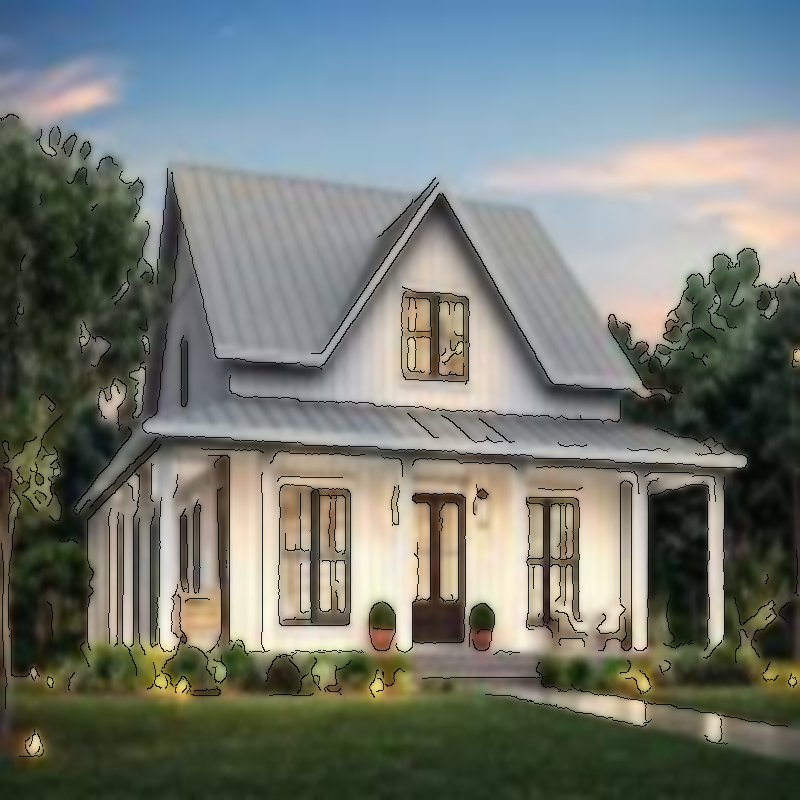

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread("/content/drive/MyDrive/images.jpg")
if img is None:
    print("Image not found")
    exit()

# Resize (optional for faster results)
img = cv2.resize(img, (800, 800))

# Step 1: Edge detection (clean outlines)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 7)                   # smooth before edges
edges = cv2.Canny(gray, 80, 180)                 # detect edges
edges = cv2.bitwise_not(edges)                   # invert (white background)
edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Step 2: Smooth & flatten colors (cartoon paint look)
color = img.copy()
for _ in range(3):  # apply filter multiple times
    color = cv2.bilateralFilter(color, d=9, sigmaColor=150, sigmaSpace=150)

# Step 3: Mix edges with smoothed image
cartoon_raw = cv2.bitwise_and(color, edges_colored)

# Step 4: Blend with original to look more natural
cartoon_final = cv2.addWeighted(cartoon_raw, 0.85, img, 0.15, 0)

# Show results
cv2_imshow(cartoon_final)
cv2.imwrite("cartoon_best.jpg", cartoon_final)
cv2.destroyAllWindows()
